# **A Jupyter Notebook away of forecasting 2.0**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import statistics as stats


plt.ion()
sns.set_theme(style="darkgrid")

In [13]:
!pip install pystan==2.19.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [16]:
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 8.7 MB/s 
     |████████████████████████████████| 357 kB 52.8 MB/s 
     |████████████████████████████████| 1.6 MB 39.5 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=de40baa505ed2b6726ff580e67858beef7be9fb4e584b892e9a3df5a618d4160
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [18]:
#interactive data visualization
import plotly.express as px
import plotly.figure_factory as ff

## **Data**

In [19]:
maitenes_df = pd.read_csv('maitenes.csv')
maitenes_df['Unnamed: 0'] = pd.to_datetime(maitenes_df['Unnamed: 0'], format= '%Y/%m/%d')
maitenes_df.rename(columns={'Unnamed: 0': 'date'},inplace = True)
maitenes_df.head()

,date,SO2,NO2,NO,NOX,O3,CO
0,2017-09-06 18:00:00,3.22,2.16,2.01888,4.18258,21.0,0.22
1,2017-09-06 19:00:00,3.58,3.25,2.20725,5.46078,18.0,0.25
2,2017-09-06 20:00:00,7.39,13.01,2.41338,15.42390,9.0,0.29
3,2017-09-06 21:00:00,6.40,12.33,2.38637,14.72000,10.0,0.28
4,2017-09-06 22:00:00,4.77,7.22,2.31295,9.53500,13.0,0.27


In [33]:
SO2 = maitenes_df.loc[maitenes_df['SO2']>50]


## **Con SO2 > 50**

Se consideran todos los datos disponibles

In [24]:
subset = SO2[['date','SO2']]
subset = subset.rename(columns= {'date':'ds', 'SO2':'y'})

In [25]:
#for forecast
m = Prophet()
m.fit(subset)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjocztc55/_ms76dqe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjocztc55/w7gyjhww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70207', 'data', 'file=/tmp/tmpjocztc55/_ms76dqe.json', 'init=/tmp/tmpjocztc55/w7gyjhww.json', 'output', 'file=/tmp/tmpjocztc55/prophet_modeliquu79aa/prophet_model-20221026031913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:19:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:19:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [26]:
future = m.make_future_dataframe(periods=10)
future.tail()

,ds
1741,2022-08-15 14:00:00
1742,2022-08-16 14:00:00
1743,2022-08-17 14:00:00
1744,2022-08-18 14:00:00
1745,2022-08-19 14:00:00


In [27]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1741,2022-08-15 14:00:00,69.892399,27.030731,118.665622
1742,2022-08-16 14:00:00,71.865701,27.096771,115.762371
1743,2022-08-17 14:00:00,74.150972,28.192332,121.327403
1744,2022-08-18 14:00:00,71.217629,23.015233,119.573615
1745,2022-08-19 14:00:00,69.289340,24.039205,112.648151


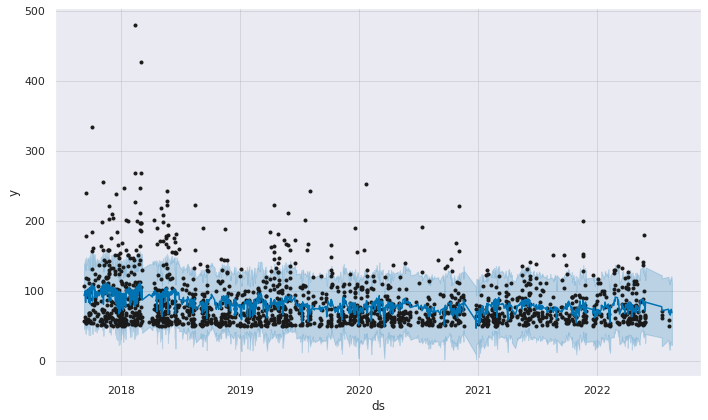

In [28]:
fig1 = m.plot(forecast)

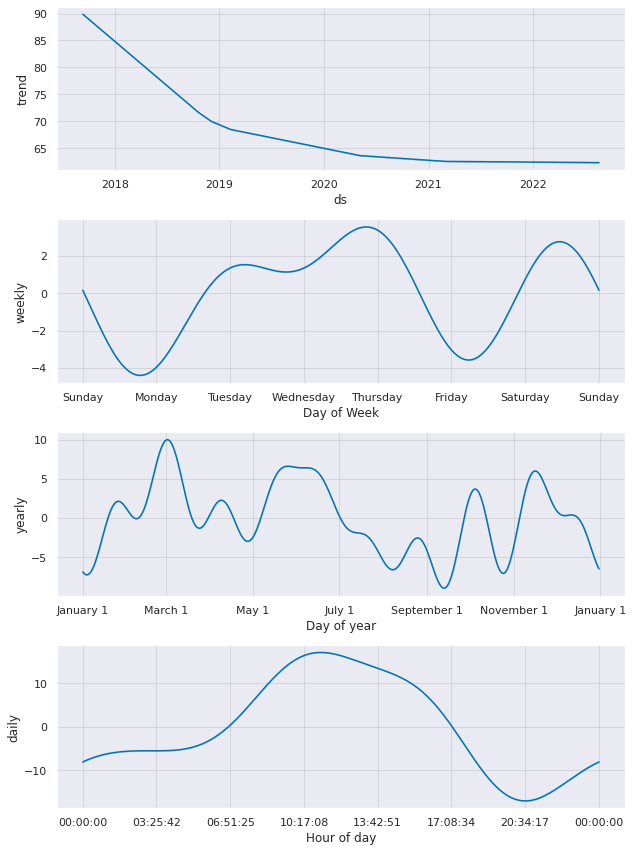

In [29]:
fig2 = m.plot_components(forecast)

In [30]:
plot_plotly(m, forecast)

In [31]:
plot_components_plotly(m, forecast)


## **Prophet**

In [35]:
SO2 = SO2[SO2['date'].dt.year > 2019]
SO2.head()

,date,SO2,NO2,NO,NOX,O3,CO
20310,2020-01-01 00:00:00,57.37,17.71,21.97980,39.68880,14.0,0.32
20311,2020-01-01 01:00:00,76.72,19.48,38.35950,57.83830,13.0,0.32
20326,2020-01-01 16:00:00,51.30,3.89,2.31667,6.20182,22.0,0.15
20372,2020-01-03 14:00:00,67.53,4.19,4.77815,8.96445,18.0,0.11
20395,2020-01-04 13:00:00,60.05,6.45,8.96095,15.40860,19.0,0.15


In [36]:
subset = SO2[['date','SO2']]
subset = subset.rename(columns= {'date':'ds', 'SO2':'y'})

In [37]:
#for forecast
m = Prophet()
m.fit(subset)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjocztc55/_hxlducx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjocztc55/ipqf_znb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66544', 'data', 'file=/tmp/tmpjocztc55/_hxlducx.json', 'init=/tmp/tmpjocztc55/ipqf_znb.json', 'output', 'file=/tmp/tmpjocztc55/prophet_model2w0vgmel/prophet_model-20221026033424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:34:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:34:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [38]:
future = m.make_future_dataframe(periods=10)
future.tail()

,ds
703,2022-08-15 14:00:00
704,2022-08-16 14:00:00
705,2022-08-17 14:00:00
706,2022-08-18 14:00:00
707,2022-08-19 14:00:00


In [39]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
703,2022-08-15 14:00:00,77.000730,46.566176,107.715612
704,2022-08-16 14:00:00,72.719533,42.254406,105.726527
705,2022-08-17 14:00:00,68.641949,37.603258,98.483395
706,2022-08-18 14:00:00,76.403905,46.344816,105.950977
707,2022-08-19 14:00:00,72.071256,40.257437,103.466202


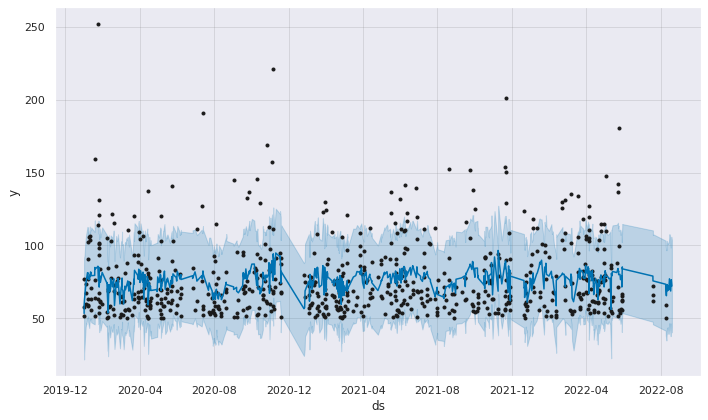

In [40]:
fig1 = m.plot(forecast)

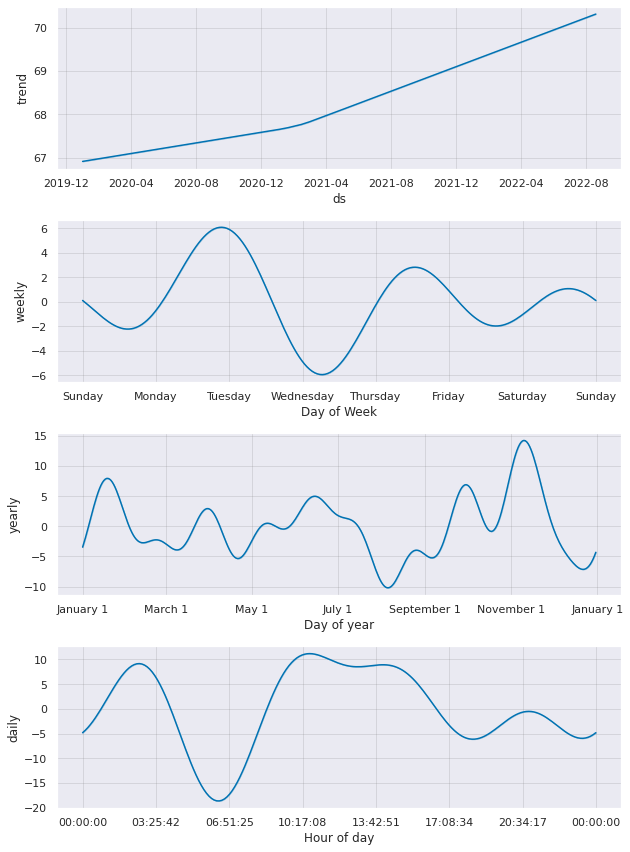

In [41]:
fig2 = m.plot_components(forecast)

In [42]:
plot_plotly(m, forecast)

In [43]:
plot_components_plotly(m, forecast)
